In [1]:
library(data.table)
library(ggplot2)
library(ggrepel)
library(dplyr)
#library(ggpubr)
library(ggsci)
library(gridExtra)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
# Load cNMF spectra
spectra = fread("results/cNMF_k17_spectra.csv", header=TRUE)
dim(spectra)

[1] 17707    18

In [3]:
head(spectra)

V1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AL627309.1,4.485349e-05,-1.680707e-05,2.711908e-04,1.997887e-07,-9.140902e-05,-9.808954e-05,-7.381997e-05,-6.268320e-05,-3.633258e-05,6.292237e-05,-9.241467e-06,-9.984880e-05,-5.924426e-05,-1.198333e-04,-2.798399e-05,1.071399e-04,-2.470636e-05
AL669831.5,-1.697107e-04,-3.563389e-05,6.446964e-04,-9.630837e-05,-1.289465e-04,-2.015122e-05,-2.225976e-04,-1.543368e-04,-1.279373e-04,-4.932020e-06,-1.586984e-05,1.102403e-04,-1.620719e-05,-2.327429e-04,3.261986e-04,7.439245e-04,-1.118246e-05
FAM87B,-1.807355e-05,-8.748641e-05,2.689533e-04,-8.261776e-05,-4.143518e-05,-9.672403e-05,-7.154163e-05,6.920848e-05,-2.496312e-05,1.567523e-04,3.548425e-05,3.772697e-05,-7.325861e-05,4.441635e-05,-4.668193e-05,5.473440e-05,-8.926566e-05
LINC00115,-1.900908e-04,2.566267e-05,5.405301e-04,-1.569890e-04,-1.337640e-04,-1.078063e-04,-1.092501e-04,9.748622e-05,-1.121921e-04,1.944148e-04,5.504398e-05,-2.010044e-04,-6.443721e-05,-1.450158e-04,2.775289e-04,-1.975113e-06,2.544851e-07
FAM41C,-2.134161e-04,2.391466e-05,2.922115e-05,-4.882318e-05,1.211709e-04,2.003466e-05,-1.004547e-04,-1.544578e-04,-1.514857e-04,6.953128e-05,2.838061e-04,1.150518e-04,4.878670e-06,-9.803116e-05,2.850981e-04,3.000089e-04,2.977847e-04
AL645608.3,-5.969878e-05,1.355644e-04,2.020424e-04,-4.142724e-05,-1.115866e-04,-9.989469e-05,-6.750025e-05,-3.853746e-05,-5.470746e-05,1.035167e-04,-1.153514e-04,1.628124e-04,6.535534e-05,-4.376136e-05,-5.488670e-05,-2.537307e-05,-4.718835e-05


In [4]:
# Format spectrum matrix
gene_symbols = spectra$V1
spectra = data.matrix(spectra[, -1])
rownames(spectra) = gene_symbols

In [5]:
head(spectra)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
AL627309.1,4.485349e-05,-1.680707e-05,2.711908e-04,1.997887e-07,-9.140902e-05,-9.808954e-05,-7.381997e-05,-6.268320e-05,-3.633258e-05,6.292237e-05,-9.241467e-06,-9.984880e-05,-5.924426e-05,-1.198333e-04,-2.798399e-05,1.071399e-04,-2.470636e-05
AL669831.5,-1.697107e-04,-3.563389e-05,6.446964e-04,-9.630837e-05,-1.289465e-04,-2.015122e-05,-2.225976e-04,-1.543368e-04,-1.279373e-04,-4.932020e-06,-1.586984e-05,1.102403e-04,-1.620719e-05,-2.327429e-04,3.261986e-04,7.439245e-04,-1.118246e-05
FAM87B,-1.807355e-05,-8.748641e-05,2.689533e-04,-8.261776e-05,-4.143518e-05,-9.672403e-05,-7.154163e-05,6.920848e-05,-2.496312e-05,1.567523e-04,3.548425e-05,3.772697e-05,-7.325861e-05,4.441635e-05,-4.668193e-05,5.473440e-05,-8.926566e-05
LINC00115,-1.900908e-04,2.566267e-05,5.405301e-04,-1.569890e-04,-1.337640e-04,-1.078063e-04,-1.092501e-04,9.748622e-05,-1.121921e-04,1.944148e-04,5.504398e-05,-2.010044e-04,-6.443721e-05,-1.450158e-04,2.775289e-04,-1.975113e-06,2.544851e-07
FAM41C,-2.134161e-04,2.391466e-05,2.922115e-05,-4.882318e-05,1.211709e-04,2.003466e-05,-1.004547e-04,-1.544578e-04,-1.514857e-04,6.953128e-05,2.838061e-04,1.150518e-04,4.878670e-06,-9.803116e-05,2.850981e-04,3.000089e-04,2.977847e-04
AL645608.3,-5.969878e-05,1.355644e-04,2.020424e-04,-4.142724e-05,-1.115866e-04,-9.989469e-05,-6.750025e-05,-3.853746e-05,-5.470746e-05,1.035167e-04,-1.153514e-04,1.628124e-04,6.535534e-05,-4.376136e-05,-5.488670e-05,-2.537307e-05,-4.718835e-05


In [6]:
markers = read.csv("data/cNMF_markers_matthias.csv", header=FALSE)
markers = as.matrix(markers[, -1])

In [7]:
ggsci::pal_igv()(20)

[1] "#5050FFFF" "#CE3D32FF" "#749B58FF" "#F0E685FF" "#466983FF" "#BA6338FF"
 [7] "#5DB1DDFF" "#802268FF" "#6BD76BFF" "#D595A7FF" "#924822FF" "#837B8DFF"
[13] "#C75127FF" "#D58F5CFF" "#7A65A5FF" "#E4AF69FF" "#3B1B53FF" "#CDDEB7FF"
[19] "#612A79FF" "#AE1F63FF"

In [8]:
markers[2, ]

V2         V3         V4         V5         V6         V7         V8 
  "HAPLN1"   "ADAM28" "ADAMDEC1"      "A2M"  "COL18A1"    "CCL13"    "ABCA8" 
        V9        V10        V11 
    "CCL8"    "TGFBI"    "CCL11"

In [9]:
plotSpectrum = function(spectra, markers, k) {
    
    tab = data.frame(value=spectra[, k])
    tab$gene_symbol = rownames(tab)

    tab$ranking = rank(-tab$value)
    
    # Highlight genes
    tab$highlight = tab$gene_symbol %in% markers[k, ]

    # Highlighted labels
    tab$gene_symbol_show = tab$gene_symbol
    tab$gene_symbol_show[!tab$gene_symbol %in% markers[k, ]] = ""

    pl = ggplot(tab %>% filter(ranking <= 100), aes(x=ranking, y=value, label=gene_symbol_show, color=highlight)) +
        geom_point(size=0.5) +
        geom_text_repel(size=3, max.overlaps=100, color="black") +
        scale_color_manual(values=c("grey70", "firebrick1"), guide="none") +
        
        scale_color_manual(values=c("grey70", ggsci::pal_igv()(20)[k]), guide="none") +
        #ylab(paste0("cNMF_", k, " spectrum")) +
        ylab(paste0("F", k)) +
        xlab("") +
        #theme_light()
        #theme_minimal()
        #theme_light()

        #theme(panel.background = element_blank(), panel.grid.major = element_blank(), panel.grid.minor = element_blank())
        #theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())
        
        # classic with light axis lines
        theme_classic() +
        theme(axis.line=element_line(size=0.2), axis.ticks=element_line(size = 0.2)) +
        theme(legend.position = "none")
        
        # minimalist
        #theme_void()
    
    return(pl)
}

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


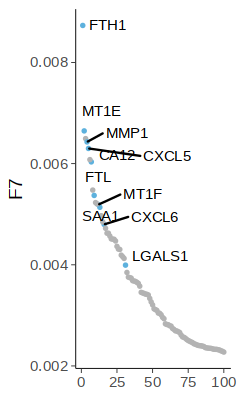

In [10]:
options(repr.plot.width=2, repr.plot.height=3.5)

plotSpectrum(spectra, markers, 7)

In [11]:
# plot all
plot_list = lapply(1:ncol(spectra), function(k) {
    plotSpectrum(spectra, markers, k)
})

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is

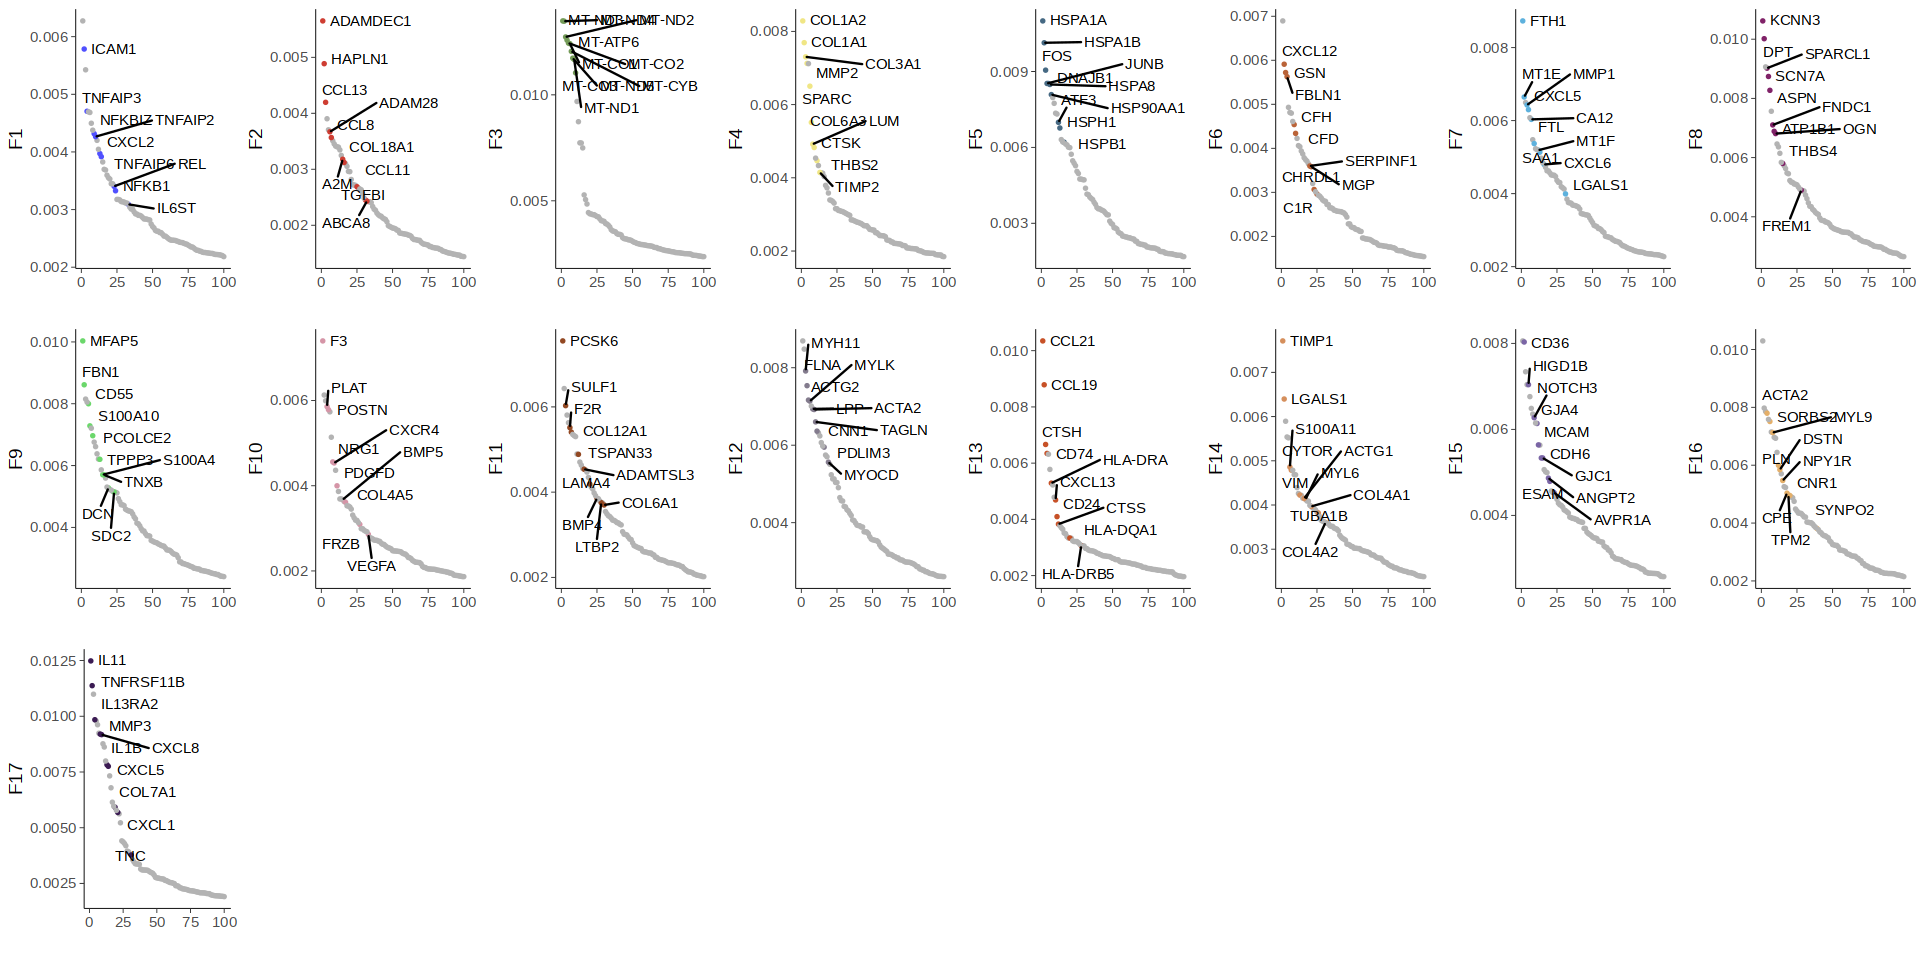

In [329]:
width=16; height=8;
options(repr.plot.width=width, repr.plot.height=height)

grid.arrange(grobs = plot_list, ncol=8)  # can do 8 max columns (for some reason)

ggsave(file="figures/cNMF_k17_spectra_ranking.pdf", arrangeGrob(grobs=plot_list, ncol=8), width=width, height=height)

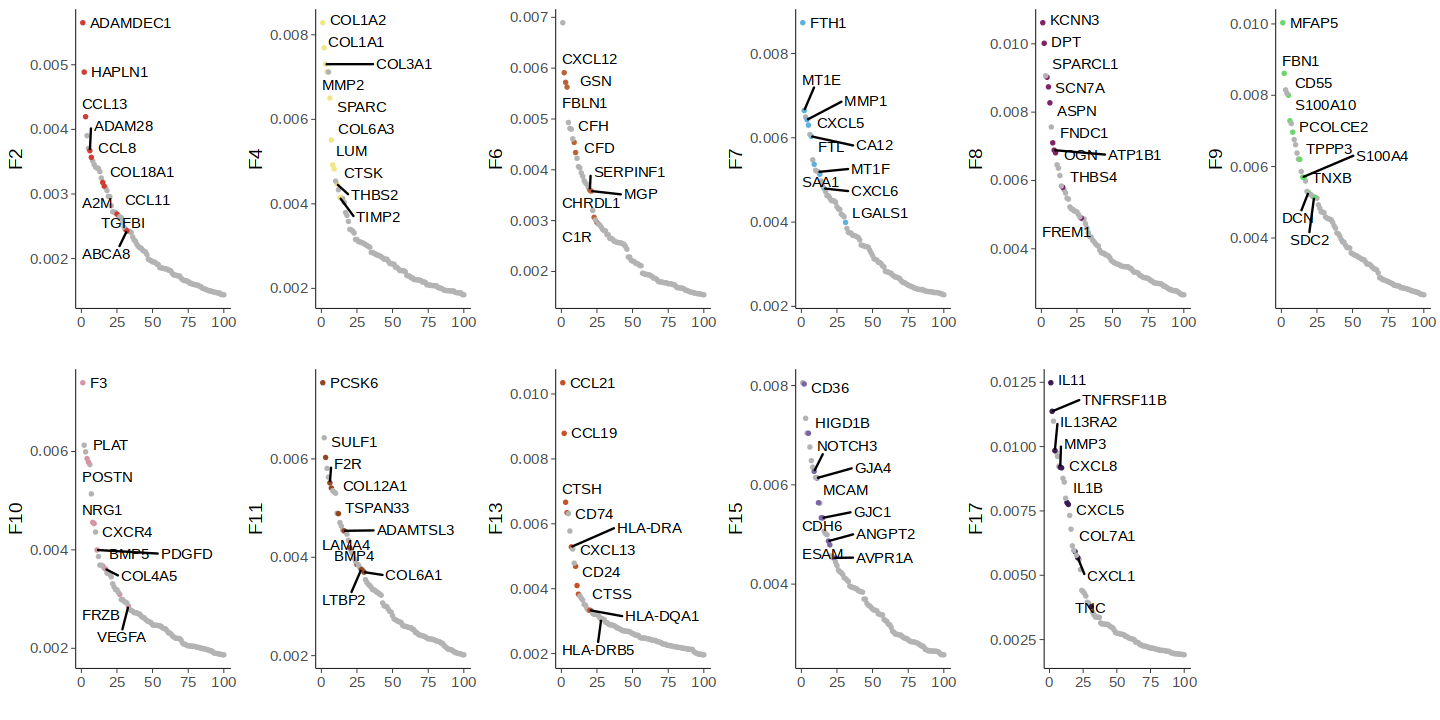

In [22]:
# Split ranking plots into cell-type specific and shared programs
cell_type_specific = c(2, 4, 6, 7, 8, 9, 10, 11, 13, 15, 17)
shared = c(1, 3, 5, 12, 14, 16)

width=12; height=6;
options(repr.plot.width=width, repr.plot.height=height)

grid.arrange(grobs = plot_list[cell_type_specific], ncol=6)  # can do 8 max columns (for some reason)

ggsave(file="figures/cNMF_k17_spectra_ranking_cell_type.pdf", arrangeGrob(grobs=plot_list[cell_type_specific], ncol=6), width=width, height=height)

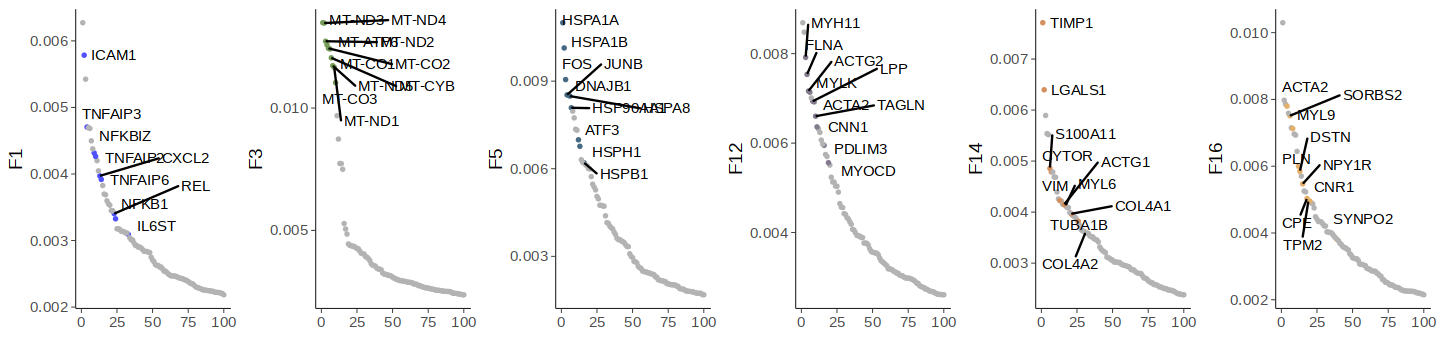

In [23]:
width=12; height=3;
options(repr.plot.width=width, repr.plot.height=height)

grid.arrange(grobs = plot_list[shared], ncol=6)  # can do 8 max columns (for some reason)

ggsave(file="figures/cNMF_k17_spectra_ranking_shared.pdf", arrangeGrob(grobs=plot_list[shared], ncol=6), width=width, height=height)

In [90]:
#sort(spectra[, k], decreasing=TRUE)[1:100]

In [91]:
#plot(sort(spectra[, k], decreasing=TRUE)[1:1000], pch=16, cex=0.5)